In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save the references to the tables

Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

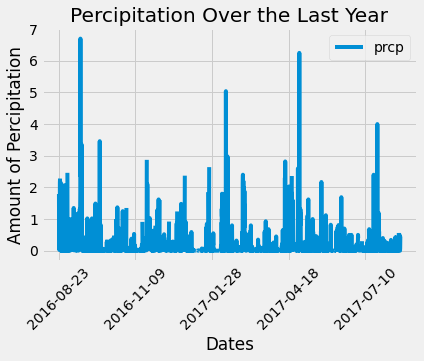

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
Prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year)

# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp_df = pd.DataFrame(Prcp, columns = ['date','prcp'])
Prcp_df.head()

# Sort the dataframe by date
Prcp_df = Prcp_df.sort_values("date")
Prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
Prcp_df.plot( x = 'date', y = 'prcp', rot = 45)
plt.title("Percipitation Over the Last Year")
plt.xlabel("Dates")
plt.ylabel("Amount of Percipitation")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(Measurement).group_by(Measurement.station).count()
number_of_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count(Measurement.station)
session.query(Measurement.station, count_).group_by(Measurement.station).order_by(count_.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_count = func.max(Measurement.tobs)
min_count = func.min(Measurement.tobs)
avg_count = func.avg(Measurement.tobs)

Max, Min, Avg = session.query(max_count, min_count, avg_count ).\
    filter(Measurement.station == 'USC00519281').first()

print(f'The max temperature is {Max}, the minimum temperature is {Min} and the avg temperature for station USC00519281 is {Avg}.')
Max
Min
Avg


The max temperature is 85.0, the minimum temperature is 54.0 and the avg temperature for station USC00519281 is 71.66378066378067.


71.66378066378067

In [15]:
# Using the most active station id
max_count = func.max(Measurement.date)
most_recent_date = session.query(Measurement.date, max_count).\
    filter_by(station = 'USC00519281').first()
last_year = dt.date(2017, 8, 18) - dt.timedelta(days = 365)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year)

#display query results into a dataframe
Temps_df = pd.DataFrame(Temps, columns = ['date','Tobs'])
Temps_df.head()


,date,Tobs
0,2016-08-18,80.0
1,2016-08-19,77.0
2,2016-08-20,80.0
3,2016-08-21,76.0
4,2016-08-22,77.0


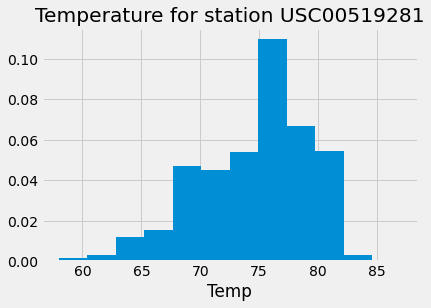

In [18]:
#plot the temps data into a histogram
plt.hist(Temps_df["Tobs"], density = True, bins = 12)
plt.title("Temperature for station USC00519281")
plt.xlabel("Temp")
plt.show()

# Close session

In [19]:
# Close Session
session.close()